# linear regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt

In [2]:
""" us-counties.csv contains data of the daily number of new cases and deaths,
the seven-day rolling average and the seven-day rolling average per 100,000 residents of US at county level. 
The average reported is the seven day trailing average i.e. average of the day reported and six days prior."""

' us-counties.csv contains data of the daily number of new cases and deaths,\nthe seven-day rolling average and the seven-day rolling average per 100,000 residents of US at county level. \nThe average reported is the seven day trailing average i.e. average of the day reported and six days prior.'

In [3]:
df = pd.read_csv("us-counties.csv")

In [4]:
df.head(5)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1.0,0.14,0.02,0.0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1.0,0.14,0.00,0.0,0.0,0.0


In [5]:
df["date"] = pd.to_datetime(df["date"])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390815 entries, 0 to 1390814
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   date                 1390815 non-null  datetime64[ns]
 1   geoid                1390815 non-null  object        
 2   county               1390815 non-null  object        
 3   state                1390815 non-null  object        
 4   cases                1390814 non-null  float64       
 5   cases_avg            1390814 non-null  float64       
 6   cases_avg_per_100k   1375820 non-null  float64       
 7   deaths               1390814 non-null  float64       
 8   deaths_avg           1390814 non-null  float64       
 9   deaths_avg_per_100k  1375820 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 106.1+ MB


,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1.0,0.14,0.02,0.0,0.00,0.00
1,2020-01-22,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.00,0.00
2,2020-01-23,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.00,0.00
3,2020-01-24,USA-53061,Snohomish,Washington,0.0,0.14,0.02,0.0,0.00,0.00
4,2020-01-24,USA-17031,Cook,Illinois,1.0,0.14,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1390810,2021-06-04,USA-18121,Parke,Indiana,1.0,0.83,4.92,0.0,0.00,0.00
1390811,2021-06-04,USA-18119,Owen,Indiana,3.0,1.50,7.21,0.0,0.14,0.69
1390812,2021-06-04,USA-18117,Orange,Indiana,2.0,0.50,2.55,0.0,0.00,0.00
1390813,2021-06-04,USA-18115,Ohio,Indiana,0.0,0.17,2.84,0.0,0.00,0.00


In [6]:
county = df[(df["county"] == "King") & (df["state"] == "Washington")]
county

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
357,2020-02-28,USA-53033,King,Washington,1.0,0.14,0.01,0.0,0.00,0.00
379,2020-02-29,USA-53033,King,Washington,3.0,0.57,0.03,1.0,0.14,0.01
401,2020-03-01,USA-53033,King,Washington,7.0,1.57,0.07,2.0,0.43,0.02
429,2020-03-02,USA-53033,King,Washington,4.0,2.14,0.10,3.0,0.86,0.04
462,2020-03-03,USA-53033,King,Washington,7.0,3.14,0.14,4.0,1.43,0.06
...,...,...,...,...,...,...,...,...,...,...
1375586,2021-05-31,USA-53033,King,Washington,0.0,145.86,6.47,0.0,2.14,0.10
1378835,2021-06-01,USA-53033,King,Washington,228.0,163.29,7.25,8.0,2.86,0.13
1382084,2021-06-02,USA-53033,King,Washington,100.0,134.71,5.98,3.0,2.71,0.12
1385333,2021-06-03,USA-53033,King,Washington,138.0,119.71,5.31,3.0,2.43,0.11


In [30]:
X = county["date"].index.values
y = county["deaths_avg_per_100k"].values

In [31]:
X

array([    357,     379,     401,     429,     462,     497,     536,
           586,     661,     757,     871,    1005,    1174,    1379,
          1639,    1956,    2333,    2764,    3245,    3796,    4445,
          5225,    6144,    7179,    8318,    9550,   10916,   12457,
         14129,   15915,   17807,   19788,   21870,   24034,   26265,
         28572,   30941,   33356,   35808,   38314,   40873,   43459,
         46075,   48724,   51404,   54100,   56809,   59530,   62266,
         65015,   67777,   70551,   73336,   76127,   78927,   81735,
         84555,   87382,   90216,   93055,   95901,   98761,  101628,
        104500,  107381,  110267,  113159,  116131,  119110,  122094,
        125088,  128088,  131092,  134099,  137106,  140114,  143126,
        146140,  149158,  152180,  155205,  158234,  161271,  164315,
        167359,  170409,  173463,  176518,  179575,  182634,  185698,
        188767,  191843,  194921,  198003,  201087,  204176,  207268,
        210362,  213

In [32]:
y

array([0.  , 0.01, 0.02, 0.04, 0.06, 0.07, 0.07, 0.08, 0.1 , 0.1 , 0.1 ,
       0.08, 0.1 , 0.11, 0.13, 0.13, 0.13, 0.15, 0.15, 0.19, 0.21, 0.22,
       0.25, 0.25, 0.28, 0.3 , 0.28, 0.32, 0.37, 0.39, 0.44, 0.41, 0.36,
       0.41, 0.42, 0.39, 0.42, 0.41, 0.46, 0.51, 0.51, 0.53, 0.58, 0.52,
       0.53, 0.47, 0.46, 0.43, 0.39, 0.34, 0.36, 0.34, 0.41, 0.44, 0.42,
       0.41, 0.38, 0.37, 0.39, 0.36, 0.35, 0.36, 0.39, 0.37, 0.35, 0.32,
       0.3 , 0.27, 0.24, 0.22, 0.23, 0.23, 0.26, 0.27, 0.27, 0.25, 0.22,
       0.23, 0.23, 0.17, 0.15, 0.15, 0.13, 0.16, 0.13, 0.1 , 0.13, 0.14,
       0.11, 0.16, 0.15, 0.14, 0.16, 0.13, 0.12, 0.11, 0.09, 0.08, 0.08,
       0.06, 0.07, 0.06, 0.06, 0.04, 0.06, 0.06, 0.1 , 0.08, 0.08, 0.1 ,
       0.11, 0.13, 0.13, 0.1 , 0.12, 0.13, 0.12, 0.1 , 0.07, 0.06, 0.07,
       0.06, 0.05, 0.04, 0.05, 0.06, 0.07, 0.06, 0.06, 0.08, 0.1 , 0.1 ,
       0.11, 0.1 , 0.09, 0.11, 0.1 , 0.11, 0.13, 0.11, 0.11, 0.15, 0.14,
       0.15, 0.12, 0.07, 0.07, 0.09, 0.05, 0.04, 0.

In [33]:
X = X.reshape(-1,1)
X

array([[    357],
       [    379],
       [    401],
       [    429],
       [    462],
       [    497],
       [    536],
       [    586],
       [    661],
       [    757],
       [    871],
       [   1005],
       [   1174],
       [   1379],
       [   1639],
       [   1956],
       [   2333],
       [   2764],
       [   3245],
       [   3796],
       [   4445],
       [   5225],
       [   6144],
       [   7179],
       [   8318],
       [   9550],
       [  10916],
       [  12457],
       [  14129],
       [  15915],
       [  17807],
       [  19788],
       [  21870],
       [  24034],
       [  26265],
       [  28572],
       [  30941],
       [  33356],
       [  35808],
       [  38314],
       [  40873],
       [  43459],
       [  46075],
       [  48724],
       [  51404],
       [  54100],
       [  56809],
       [  59530],
       [  62266],
       [  65015],
       [  67777],
       [  70551],
       [  73336],
       [  76127],
       [  78927],
       [  

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

In [36]:
print(f'x-train shape [{x_train.shape}]')

x-train shape [(370, 1)]


In [38]:
print(f'y-train shape [{y_train.shape}]')

y-train shape [(370,)]


In [40]:
print(f'x-test shape [{x_test.shape}]')

x-test shape [(93, 1)]


In [41]:
print(f'y-train shape [{y_train.shape}]')

y-train shape [(370,)]


Text(0.5, 1.0, 'Covid death cases in Washington State by week')

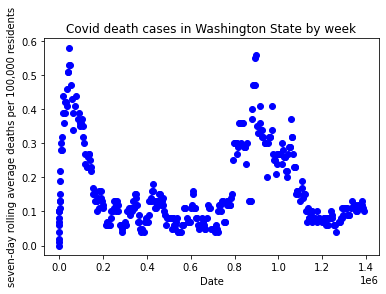

In [42]:
plt.scatter(x_train, y_train, color='blue')
plt.xlabel("Date")
plt.ylabel("seven-day rolling average deaths per 100,000 residents")
plt.title("Covid death cases in Washington State by week")
#plt.xticks(rotation = 90)

In [44]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [46]:
print(f'Training Accuracy {round(lm.score(x_train, y_train) * 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100,2)}%')

Training Accuracy 1.3%
Test Accuracy 5.25%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

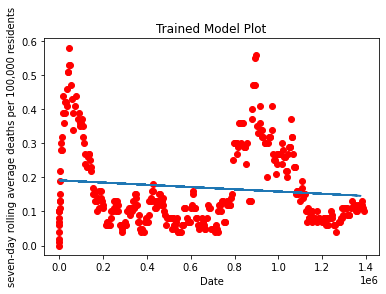

In [48]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel("Date")
plt.ylabel('seven-day rolling average deaths per 100,000 residents')
plt.title("Trained Model Plot")
plt.plot